<a href="https://colab.research.google.com/github/coldbilberry/repo-gui/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_1_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B2%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%B2%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [7]:
from sklearn.manifold import TSNE

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
pip install ucimlrepo

In [12]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
soybean_large = fetch_ucirepo(id=90)

# data (as pandas dataframes)
X = soybean_large.data.features
y = soybean_large.data.targets

# metadata
print(soybean_large.metadata)

# variable information
print(soybean_large.variables)

{'uci_id': 90, 'name': 'Soybean (Large)', 'repository_url': 'https://archive.ics.uci.edu/dataset/90/soybean+large', 'data_url': 'https://archive.ics.uci.edu/static/public/90/data.csv', 'abstract': "Michalski's famous soybean disease database", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 307, 'num_features': 35, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1980, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5JG6Z', 'creators': ['R.S. Michalski', 'R.L. Chilausky'], 'intro_paper': None, 'additional_info': {'summary': 'There are 19 classes, only the first 15 of which have been used in prior work. The folklore seems to be that the last four classes are unjustified by the data since they have so few examples. There are 35 categorical attributes, some nominal and some ordered.  The

In [13]:
X

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,1.0,1.0,NaN,0.0,NaN,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
304,0.0,1.0,NaN,0.0,NaN,0.0,3.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
305,1.0,1.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
y

,class
0,diaporthe-stem-canker
1,diaporthe-stem-canker
2,diaporthe-stem-canker
3,diaporthe-stem-canker
4,diaporthe-stem-canker
...,...
302,2-4-d-injury
303,herbicide-injury
304,herbicide-injury
305,herbicide-injury


In [15]:
X.dtypes # все признаки числовые

,0
date,float64
plant-stand,float64
precip,float64
temp,float64
hail,float64
crop-hist,float64
area-damaged,float64
severity,float64
seed-tmt,float64
germination,float64


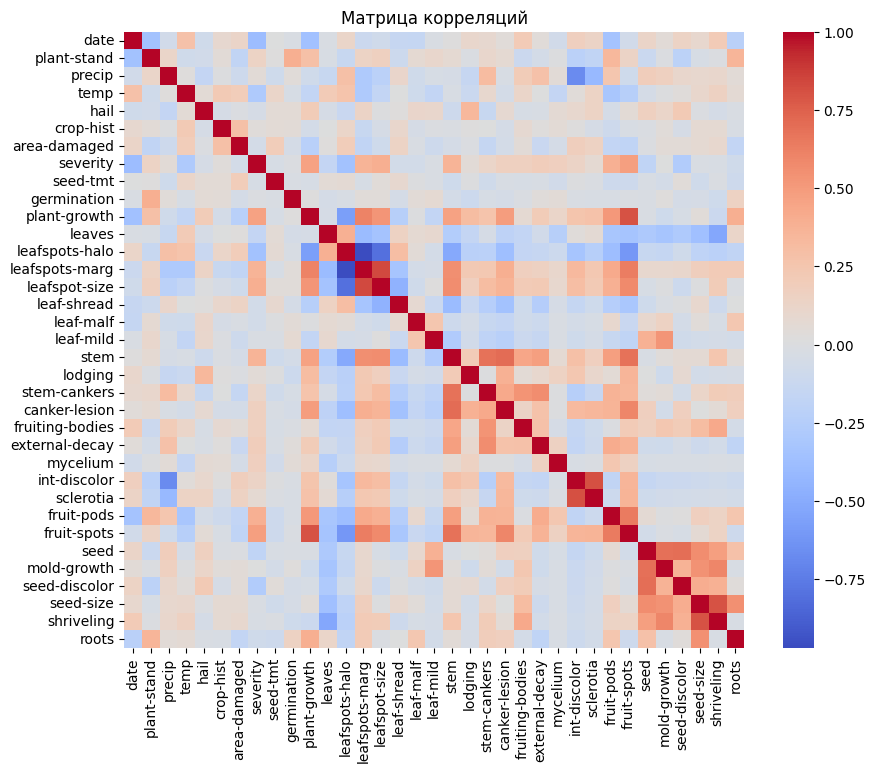

In [16]:
correlation_matrix = X.corr()
correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

Среди признаков есть высокая корреляция:

leafspots-marg - leafspot-size

stem - canker-lesion

stem - fruit-spots

sclerotia - int-discolor

leafspots-marg - leafspots-halo (отрицательная)

Коррелирующие признаки удалять не будем, т.к. получится дефицит данных.

In [17]:
X.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             306 non-null    float64
 1   plant-stand      299 non-null    float64
 2   precip           296 non-null    float64
 3   temp             300 non-null    float64
 4   hail             266 non-null    float64
 5   crop-hist        306 non-null    float64
 6   area-damaged     306 non-null    float64
 7   severity         266 non-null    float64
 8   seed-tmt         266 non-null    float64
 9   germination      271 non-null    float64
 10  plant-growth     306 non-null    float64
 11  leaves           307 non-null    int64  
 12  leafspots-halo   282 non-null    float64
 13  leafspots-marg   282 non-null    float64
 14  leafspot-size    282 non-null    float64
 15  leaf-shread      281 non-null    float64
 16  leaf-malf        282 non-null    float64
 17  leaf-mild       

In [18]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
date,306.0,3.529412,1.712285,0.0,2.0,4.0,5.0,6.0
plant-stand,299.0,0.464883,0.499601,0.0,0.0,0.0,1.0,1.0
precip,296.0,1.577703,0.713580,0.0,1.0,2.0,2.0,2.0
temp,300.0,1.130000,0.622676,0.0,1.0,1.0,2.0,2.0
hail,266.0,0.206767,0.405750,0.0,0.0,0.0,0.0,1.0
crop-hist,306.0,1.816993,0.994661,0.0,1.0,2.0,3.0,3.0
area-damaged,306.0,1.633987,1.078868,0.0,1.0,2.0,3.0,3.0
severity,266.0,0.778195,0.620145,0.0,0.0,1.0,1.0,2.0
seed-tmt,266.0,0.548872,0.632052,0.0,0.0,0.0,1.0,2.0
germination,271.0,1.014760,0.798009,0.0,0.0,1.0,2.0,2.0


In [19]:
X.isna().sum() # количество пропусков

,0
date,1
plant-stand,8
precip,11
temp,7
hail,41
crop-hist,1
area-damaged,1
severity,41
seed-tmt,41
germination,36


In [20]:
X = X.fillna(X.median())

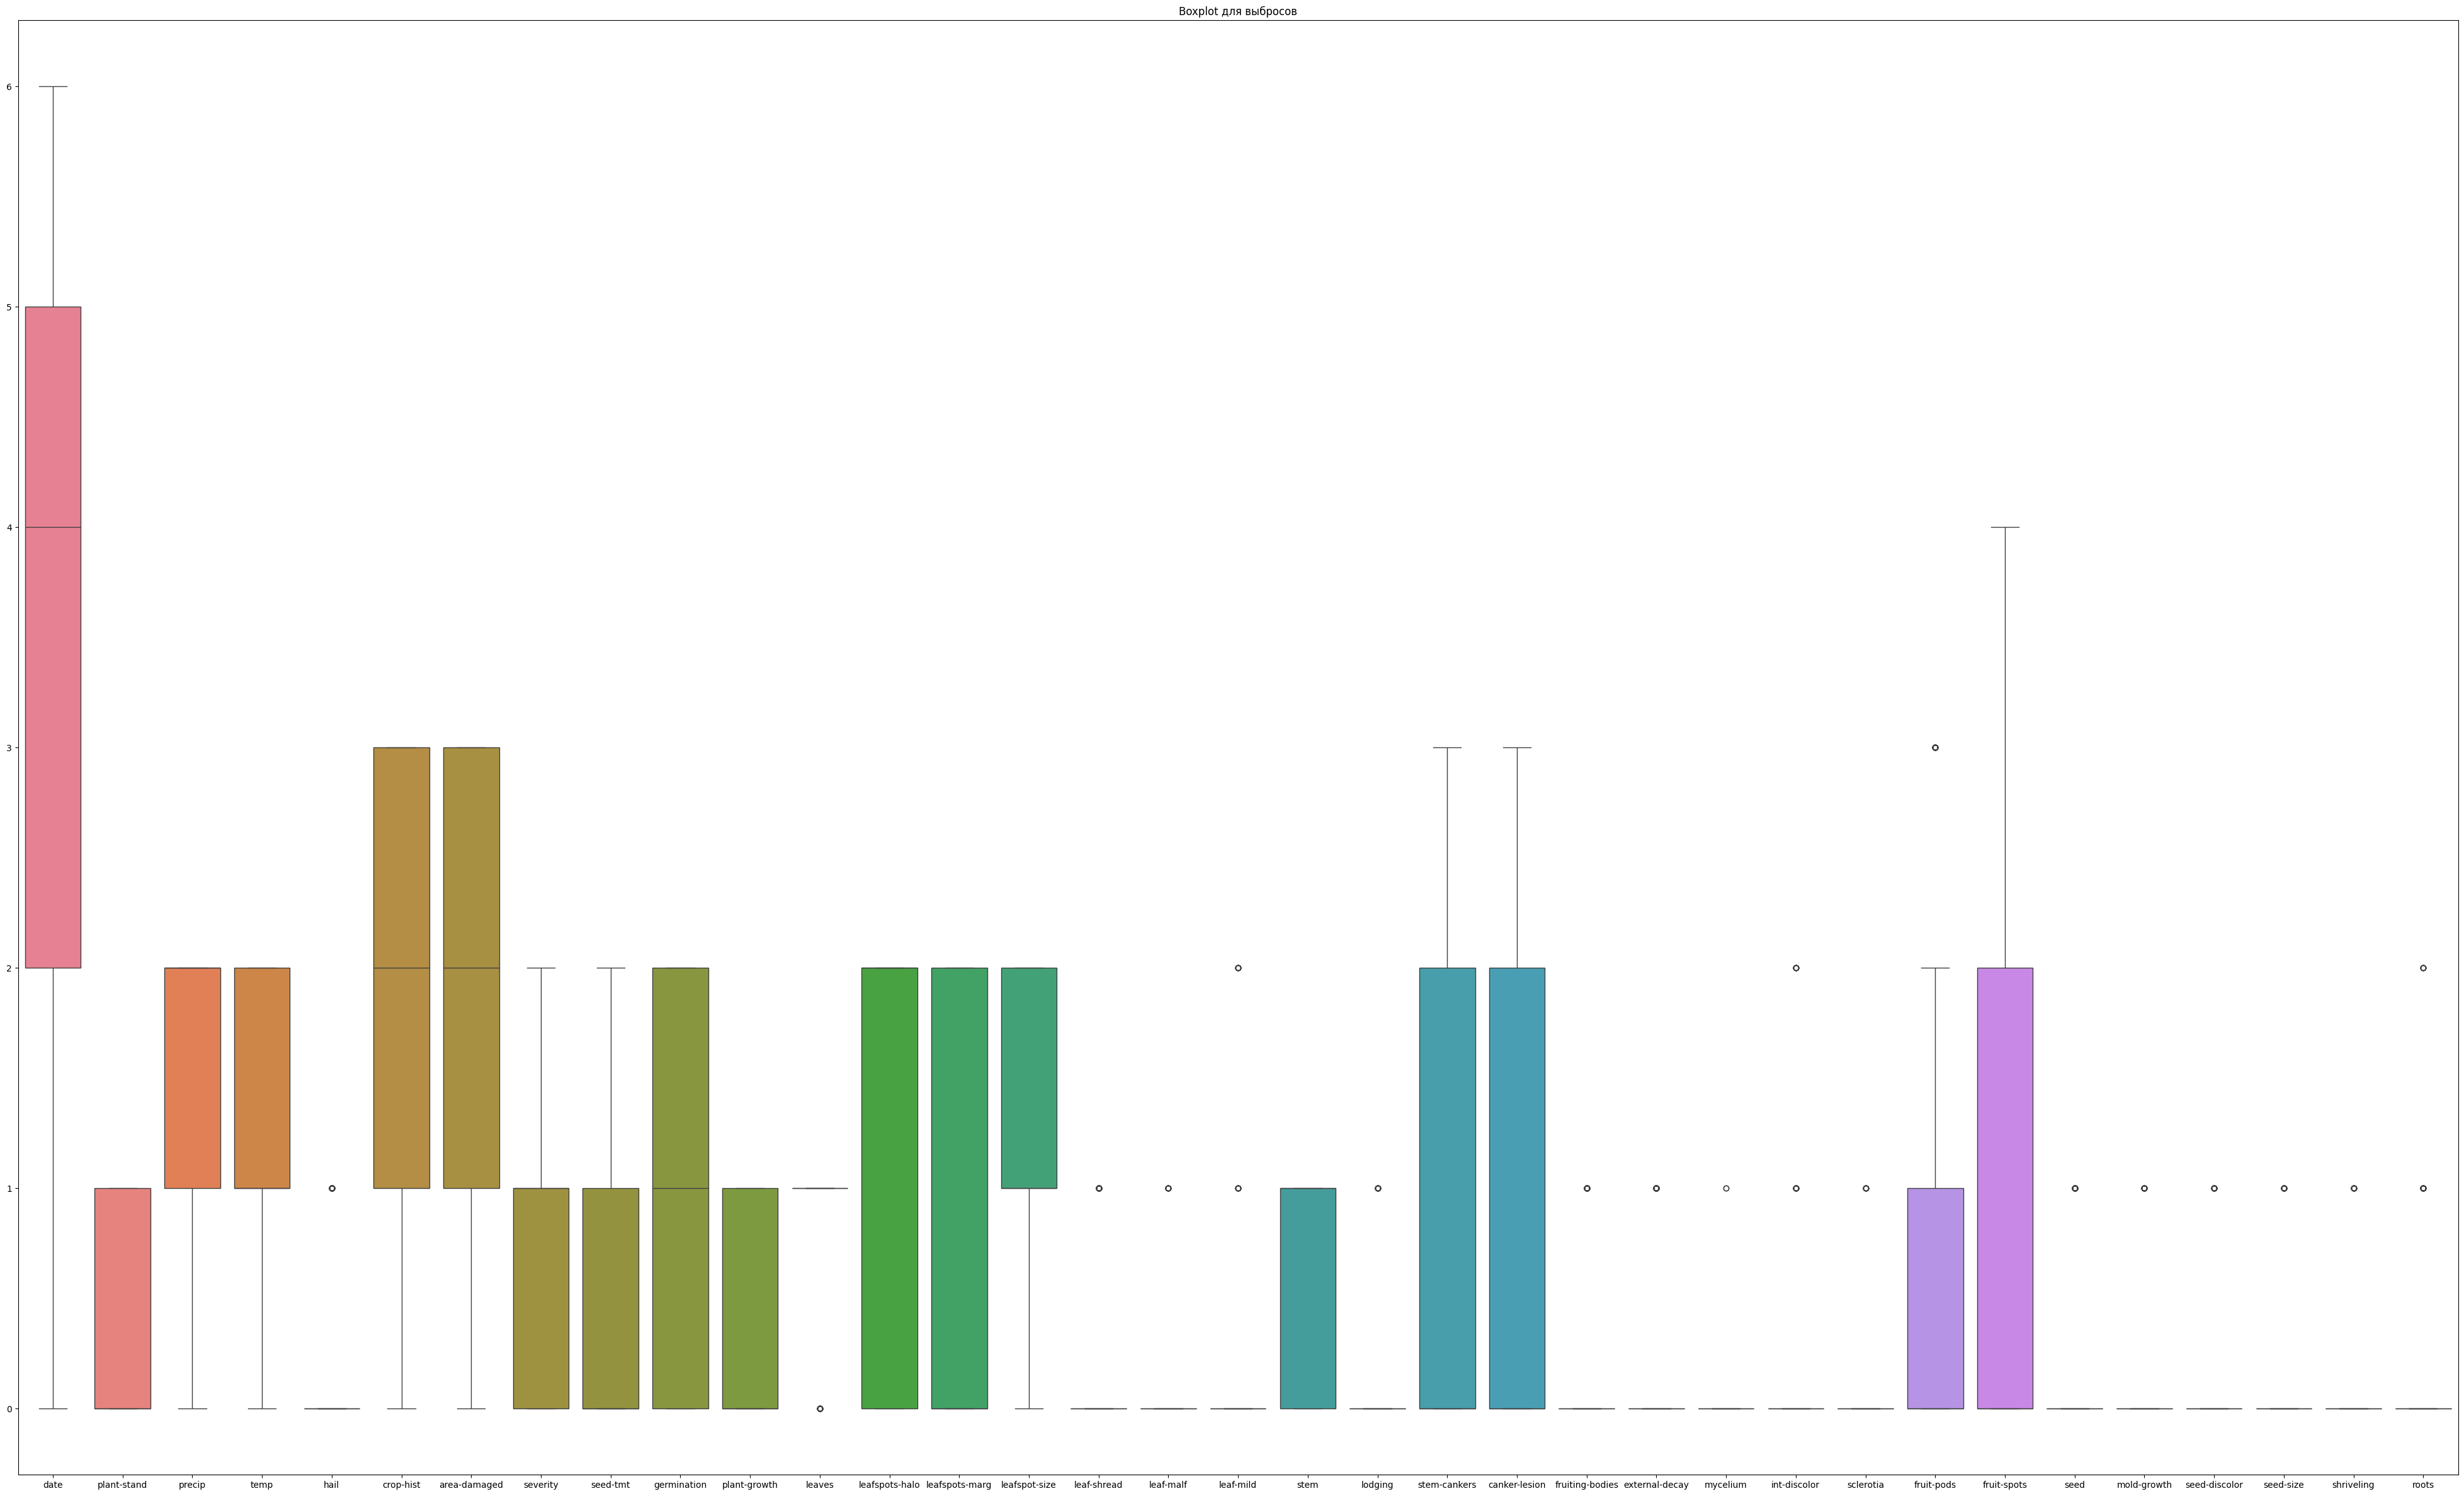

In [21]:
plt.figure(figsize=(50, 30))
sns.boxplot(data=X)
plt.title('Boxplot для выбросов')
plt.show()

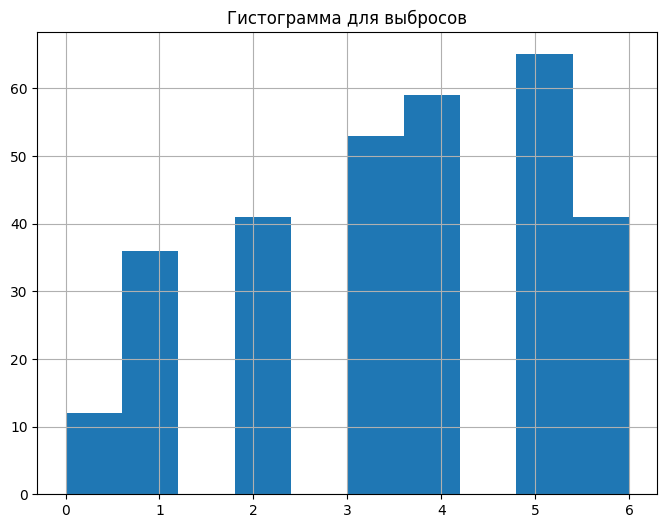

In [22]:
plt.figure(figsize=(8, 6))
X['date'].hist()
plt.title('Гистограмма для выбросов')
plt.show()

In [23]:
class_counts = y.value_counts()
print("Количество образцов в каждом классе:")
print(class_counts)

Количество образцов в каждом классе:
class                      
phytophthora-rot               40
brown-spot                     40
alternarialeaf-spot            40
frog-eye-leaf-spot             40
anthracnose                    20
brown-stem-rot                 20
rhizoctonia-root-rot           10
bacterial-blight               10
bacterial-pustule              10
charcoal-rot                   10
purple-seed-stain              10
diaporthe-stem-canker          10
downy-mildew                   10
powdery-mildew                 10
phyllosticta-leaf-spot         10
diaporthe-pod-&-stem-blight     6
cyst-nematode                   6
herbicide-injury                4
2-4-d-injury                    1
Name: count, dtype: int64


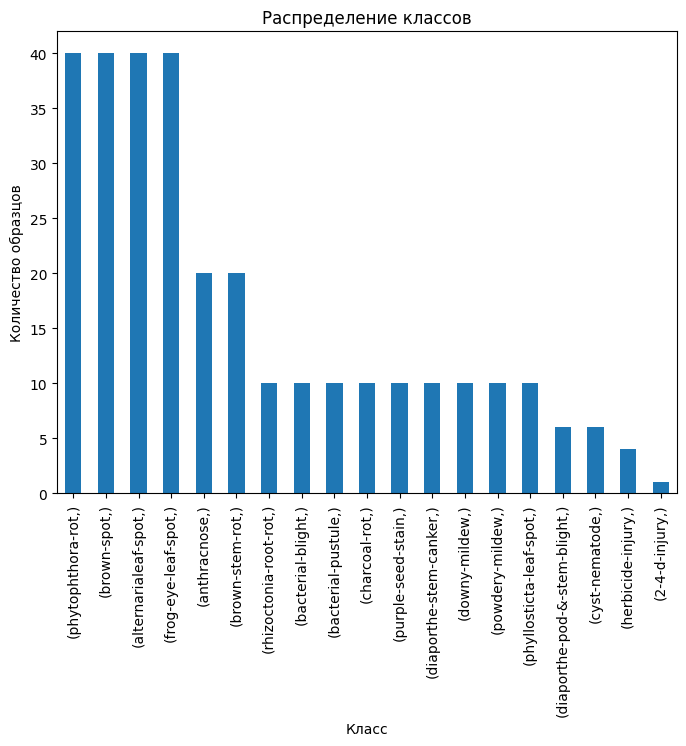

In [24]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество образцов')
plt.show()

In [25]:
# объединение датафреймов X и y
df = pd.concat([X, y], axis=1)

In [26]:
# Задание значения и количество строк для удаление
value_to_remove = 'phytophthora-rot'
num_rows_to_remove = 20

In [27]:
# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_remove]

In [28]:
# Удаление определенного количества строк
if len(filtered_df) >= num_rows_to_remove:
    df = df.drop(filtered_df.head(num_rows_to_remove).index)


# Задание значения и количество строк для удаление
value_to_remove = 'brown-spot'
num_rows_to_remove = 20


# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_remove]


# Удаление определенного количества строк
if len(filtered_df) >= num_rows_to_remove:
    df = df.drop(filtered_df.head(num_rows_to_remove).index)


# Задание значения и количество строк для удаление
value_to_remove = 'alternarialeaf-spot'
num_rows_to_remove = 20


# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_remove]


# Удаление определенного количества строк
if len(filtered_df) >= num_rows_to_remove:
    df = df.drop(filtered_df.head(num_rows_to_remove).index)

In [29]:
# Задание значения и количество строк для удаление
value_to_remove = 'frog-eye-leaf-spot'
num_rows_to_remove = 20


# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_remove]


# Удаление определенного количества строк
if len(filtered_df) >= num_rows_to_remove:
    df = df.drop(filtered_df.head(num_rows_to_remove).index)

In [30]:
# Значение и количество дубликатов для создания
value_to_duplicate = 'rhizoctonia-root-rot'
num_duplicates = 1

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)

In [31]:
# Значение и количество дубликатов для создания
value_to_duplicate = 'bacterial-blight'
num_duplicates = 1

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)

In [32]:
# Значение и количество дубликатов для создания
value_to_duplicate = 'bacterial-pustule'
num_duplicates = 1

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)


# Значение и количество дубликатов для создания
value_to_duplicate = 'charcoal-rot'
num_duplicates = 1

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)


# Значение и количество дубликатов для создания
value_to_duplicate = 'purple-seed-stain'
num_duplicates = 1

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)

In [33]:
# Значение и количество дубликатов для создания
value_to_duplicate = 'diaporthe-stem-canker'
num_duplicates = 1

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)


# Значение и количество дубликатов для создания
value_to_duplicate = 'downy-mildew'
num_duplicates = 1

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)


# Значение и количество дубликатов для создания
value_to_duplicate = 'powdery-mildew'
num_duplicates = 1

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)

In [34]:
# Значение и количество дубликатов для создания
value_to_duplicate = 'phyllosticta-leaf-spot'
num_duplicates = 1

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)


# Значение и количество дубликатов для создания
value_to_duplicate = 'diaporthe-pod-&-stem-blight'
num_duplicates = 2

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)


# Значение и количество дубликатов для создания
value_to_duplicate = 'cyst-nematode'
num_duplicates = 2

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)


# Значение и количество дубликатов для создания
value_to_duplicate = 'herbicide-injury'
num_duplicates = 4

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)

In [35]:
# Значение и количество дубликатов для создания
value_to_duplicate = '2-4-d-injury'
num_duplicates = 18

# Фильтрация строк с заданным значением
filtered_df = df[df['class'] == value_to_duplicate]

# Создание дубликатов
duplicates = pd.concat([filtered_df] * num_duplicates, ignore_index=True)

# Объединение исходного датафрейма с дубликатами
df = pd.concat([df, duplicates], ignore_index=True)

In [36]:
df

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
1,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
2,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
3,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
4,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,4.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-4-d-injury
371,4.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-4-d-injury
372,4.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-4-d-injury
373,4.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-4-d-injury


In [37]:
class_counts = df['class'].value_counts()
print("Количество образцов в каждом классе:")
print(class_counts)

Количество образцов в каждом классе:
class
diaporthe-stem-canker          20
bacterial-blight               20
frog-eye-leaf-spot             20
alternarialeaf-spot            20
phyllosticta-leaf-spot         20
anthracnose                    20
purple-seed-stain              20
charcoal-rot                   20
bacterial-pustule              20
brown-spot                     20
downy-mildew                   20
powdery-mildew                 20
brown-stem-rot                 20
phytophthora-rot               20
rhizoctonia-root-rot           20
herbicide-injury               20
2-4-d-injury                   19
diaporthe-pod-&-stem-blight    18
cyst-nematode                  18
Name: count, dtype: int64


In [38]:
X = df.drop('class', axis=1)  # Удаление колонки 'class', чтобы получить только признаки
y = df['class']  # Отдельный столбец с классами

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

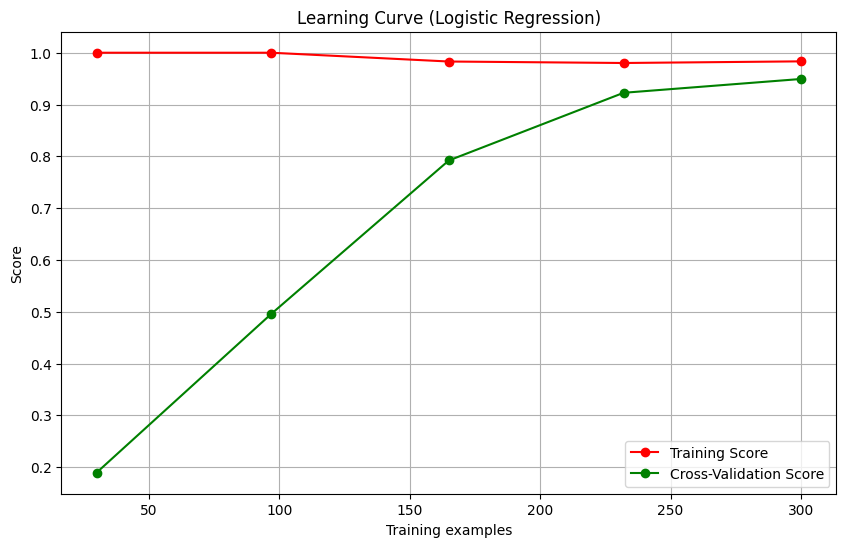

In [42]:
# Вычисление кривых обучения
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)


# Вычисление средних значений для оценок
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


# Визуализация графика обучения
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Logistic Regression)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

С увеличением количества объектов качество повышается.

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("Метрика F1 для модели мультиклассовой классификации:", f1)

Точность модели: 0.9333333333333333
Метрика F1 для модели мультиклассовой классификации: 0.9305550745550746


In [44]:
# Преобразуем метки классов в бинарный формат
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Рассчитываем AUC-ROC для каждого класса
auc_roc = []
for i in range(len(np.unique(y_test))):
    auc_roc.append(roc_auc_score(y_test_bin[:, i], model.predict_proba(X_test)[:, i]))

# Усредняем AUC-ROC по всем классам
mean_auc_roc = np.mean(auc_roc)

print("Усредненная метрика AUC-ROC для модели мультиклассовой классификации:", mean_auc_roc)

Усредненная метрика AUC-ROC для модели мультиклассовой классификации: 0.9998728705822526


In [45]:
k = 5  # количество соседей
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
# Предсказание на тестовой выборке
y_pred = knn.predict(X_test)

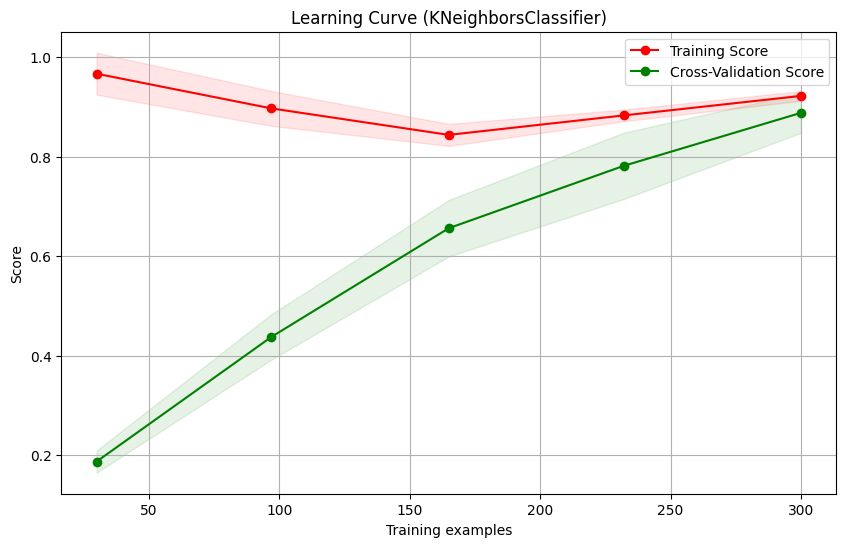

In [47]:
# Вычисление кривых обучения
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5)

# Вычисление средних значений и стандартных отклонений для оценок
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Визуализация графика обучения
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (KNeighborsClassifier)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

С увеличением количества объектов качество повышается.

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667

Classification Report:
                              precision    recall  f1-score   support

               2-4-d-injury       1.00      1.00      1.00         2
        alternarialeaf-spot       0.67      0.67      0.67         3
                anthracnose       1.00      0.80      0.89         5
           bacterial-blight       0.60      0.75      0.67         4
          bacterial-pustule       1.00      1.00      1.00         4
                 brown-spot       1.00      0.67      0.80         6
             brown-stem-rot       0.75      0.75      0.75         4
               charcoal-rot       0.75      1.00      0.86         3
              cyst-nematode       1.00      1.00      1.00         4
diaporthe-pod-&-stem-blight       1.00      1.00      1.00         1
      diaporthe-stem-canker       0.83      1.00      0.91         5
               downy-mildew       1.00      1.00      1.00         5
         frog-eye-leaf-spot       1.00      1.00

In [49]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("Метрика F1:", f1)

Метрика F1: 0.866174122174122


In [50]:
# Преобразуем метки классов в бинарный формат
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Рассчитываем AUC-ROC для каждого класса
auc_roc = []
for i in range(len(np.unique(y_test))):
    auc_roc.append(roc_auc_score(y_test_bin[:, i], knn.predict_proba(X_test)[:, i]))

# Усредняем AUC-ROC по всем классам
mean_auc_roc = np.mean(auc_roc)

print("Усредненная метрика AUC-ROC для модели мультиклассовой классификации:", mean_auc_roc)

Усредненная метрика AUC-ROC для модели мультиклассовой классификации: 0.9826267653381943


In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
predictions = rf_model.predict(X_test)

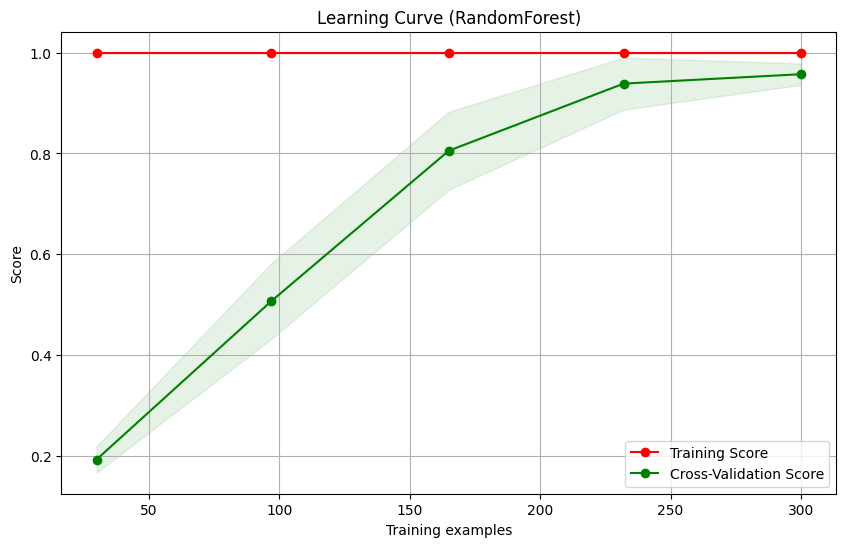

In [53]:
# Вычисление кривых обучения
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5)


# Вычисление средних значений и стандартных отклонений для оценок
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Визуализация графика обучения
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (RandomForest)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

С увеличением количества объектов качество повышается.

In [54]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9866666666666667


In [55]:
f1 = f1_score(y_test, predictions, average='weighted')
print("Метрика F1:", f1)

Метрика F1: 0.987012987012987


In [56]:
# Преобразуем метки классов в бинарный формат
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

In [57]:
# Рассчитываем AUC-ROC для каждого класса
auc_roc = []
for i in range(len(np.unique(y_test))):
    auc_roc.append(roc_auc_score(y_test_bin[:, i], rf_model.predict_proba(X_test)[:, i]))

In [58]:
# Усредняем AUC-ROC по всем классам
mean_auc_roc = np.mean(auc_roc)

In [59]:
print("Усредненная метрика AUC-ROC для модели мультиклассовой классификации:", mean_auc_roc)

Усредненная метрика AUC-ROC для модели мультиклассовой классификации: 0.9997457411645054
